In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from cycler import cycler

# Hypergraphs

A **hypergraph** $H$ denoted $H = (V, E = (e_i)_{i \in I})$ on a finite set $V$ is a family $(e_i)_{i \in I}$, where $I$ is a finite set of indexes, of subsets of $V$ called *hyperedges*. Sometimes $V$ is denoted $V(H)$ and $E$ is denoted $E(H)$.

Similar to graphs we have the notion of a subhypergraph. A hypergraph $H'$ is a **subhypergraph** of a hypergraph $H$ if $V' \subseteq V$ where
	$$
	H' = \{V', E' = (e_j)_{j \in J}\} \mbox{ such that for all } e_j \in E': e_j \subseteq V'
	$$ 
Note that we obtain $H'$ by removing edges, i.e. the vertices in edges. We do not remove vertices independently from edges, since a vertex cannot exist if an edge that contains it does not exist.

Below is an example of a hypergraph and one of its subhypergraphs. 

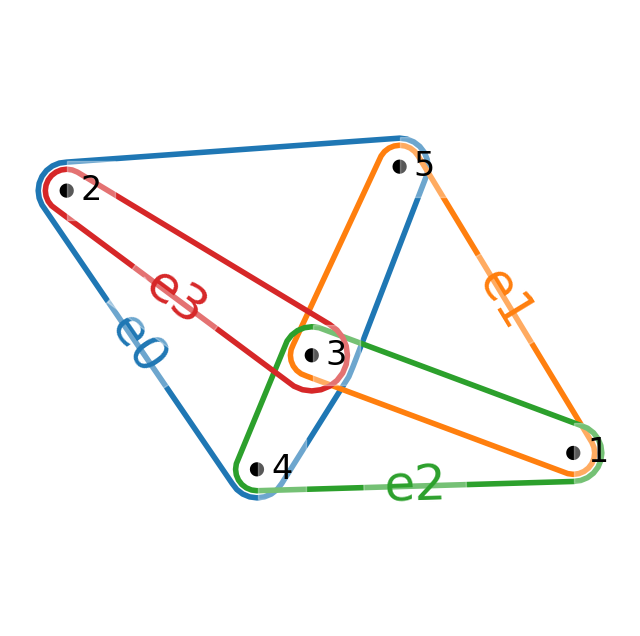

In [2]:
# Hypergraph

scenes = {
    '$e_1$': ('A', 'B', 'C'),
    '$e_2$': ('C', 'D', 'E'),
    '$e_3$': ('A', 'F', 'E'),
    '$e_4$': ('A', 'C', 'E')
}


H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 8}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 24
    },
    edge_labels_kwargs={
        'fontsize': 36
    },
    edges_kwargs={
        'linewidths': 4
    },
    **kwargs
)

#plt.savefig("subHypergraph.png")


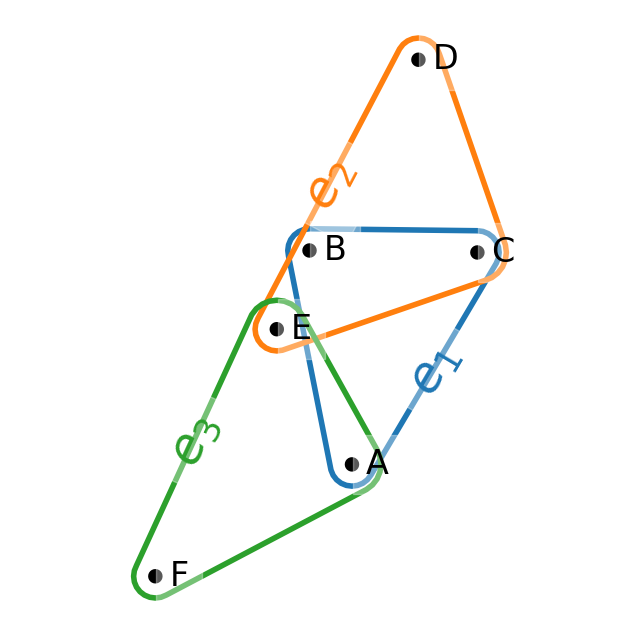

In [3]:
# Subhypergraph of the above hypergraph

scenes = {
    '$e_1$': ('A', 'B', 'C'),
    '$e_2$': ('C', 'D', 'E'),
    '$e_3$': ('A', 'F', 'E')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 8}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 24
    },
    edge_labels_kwargs={
        'fontsize': 36
    },
    edges_kwargs={
        'linewidths': 4
    },
    **kwargs
)

#plt.savefig("subHypergraph.png")


We call a hypergraph $H = (V, E)$ a **simple hypergraph** if $e_i \subseteq e_j \implies i = j$. In other words, there are no repeated hyperedges. 

## Acyclicity

We have the notion of acyclicity in hypergraphs. There are three types of acyclicity:
- $\alpha$-acyclicity
- $\beta$-acyclicity
- $\gamma$-acyclicity
Note that $\alpha$-acyclicity is the most general and $\gamma$-acyclicity is the most restrictive. If a hypergraph $H$ is $\gamma$-acyclic then it is also $\beta$ and $\alpha$-acyclic, but an $\alpha$-acyclic graph is not necessarily $\beta$ or $\gamma$-acyclic.

A simple hypergraph $H$ is **$\alpha$-acyclic** if it satisfies the GYO, Graham's Reduction, Algorithm. Graham's reduction algorithm has the following procedure:
Given a hypergraph $H$
1. Delete any vertices with degree at most 1
2. Given two edges $e_i, e_j$ such that $i \neq j$, delete $e_i$ if $e_i \subseteq e_j$
If the resulting hypergraph is empty then $H$ is $\alpha$-acyclic.

In other words a hypergraph $H$ is $\alpha$-acyclic if it can be fully reduced by the GYO algorithm. There are other notions of what is means for $H$ to be $\alpha$-acyclic, but those require more background information that is uncessary. 

**Theorem:** Let $H = (V, E)$ be a hypergraph. The following properties are equivalent.

(a) $H$ is $\alpha$-acyclic

(b) $H$ is a dual of a subtree hypergraph

(c) $H^*$ is a subtree hypergraph

(d) $H$ is a chordal hypergraph

(e) The Graham reduction terminates

A **$\beta$-cycle** in a simple hypergraph is a cycle:
$$
(x_0, e_1, x_1, e_2, x_2, \dots, e_k, x_k = x_0), k \geq 3
$$
such that for all $i \in \{0, 1, 2, \dots, k - 1\}$, $x_i$ belongs to $e_i$ and $e_{i+1}$ and no other $e_j$ from the cycle. A hypergraph is **$\beta$-acyclic** if it does not contain any $\beta$-cycle. 

**Theorem:** Let $H = (V, E)$ be a hypergraph. The following properties are equivalent. 

(a) The hypergraph is $\beta$-acyclic

(b) $H$ is totally balanced

(c) All its subhypergraphs are $\alpha$-acyclic

Note that $\beta$-acyclic hypergraphs are hereditary, and since all subgraphs of a $\alpha$-acyclic, that also means that all subgraphs are $\beta$-acyclic. $\alpha$-acyclic subgraphs are not hereditary. 

Below are examples of $\alpha$-acylic and $\beta$-acyclic hypergraphs. 

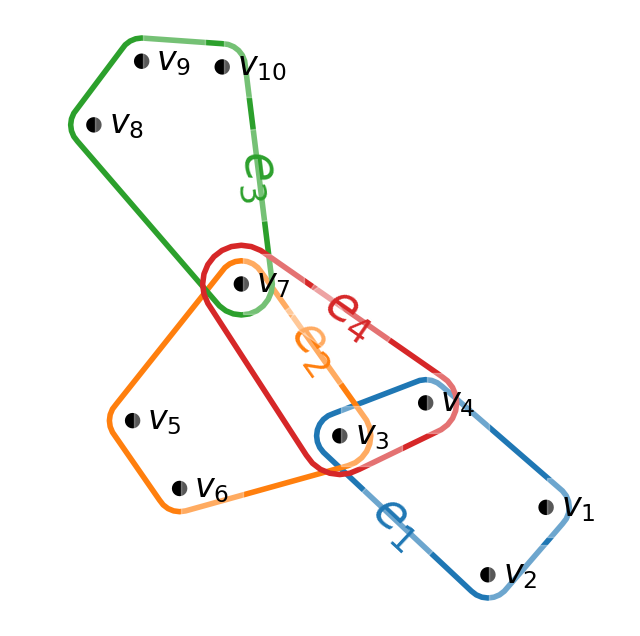

In [4]:
# \alpha-acyclic hypergraph

scenes = {
    '$e_1$': ('$v_1$', '$v_2$', '$v_3$', '$v_4$'),
    '$e_2$': ('$v_3$', '$v_5$', '$v_6$', '$v_7$'),
    '$e_3$': ('$v_7$', '$v_8$', '$v_9$', '$v_{10}$'),
    '$e_4$': ('$v_3$', '$v_4$', '$v_7$')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 0}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 24
    },
    edge_labels_kwargs={
        'fontsize': 36
    },
    edges_kwargs={
        'linewidths': 4
    },
    **kwargs
)

#plt.savefig("alphaAcyclicHypergraph.png")


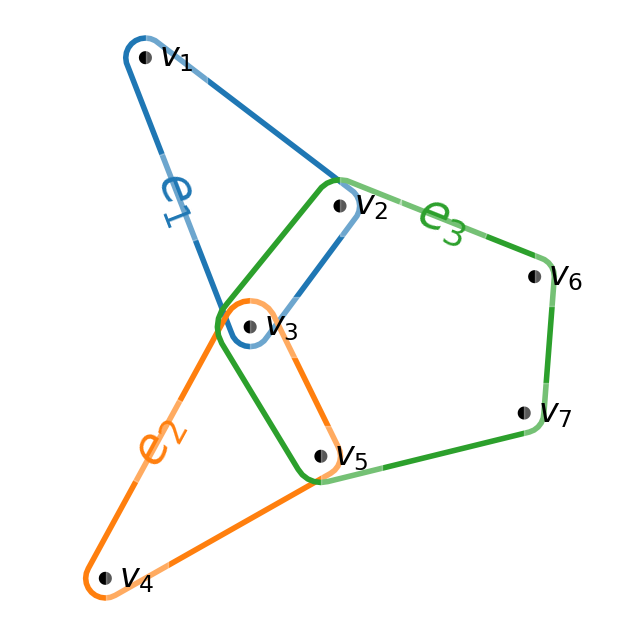

In [5]:
# \beta-acyclic hypergraph

scenes = {
    '$e_1$': ('$v_1$', '$v_2$', '$v_3$'),
    '$e_2$': ('$v_3$', '$v_4$', '$v_5$'),
    '$e_3$': ('$v_2$', '$v_3$', '$v_5$', '$v_6$', '$v_7$')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 0}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 24
    },
    edge_labels_kwargs={
        'fontsize': 36
    },
    edges_kwargs={
        'linewidths': 4
    },
    **kwargs
)

#plt.savefig("betaAcyclicHypergraph.png")


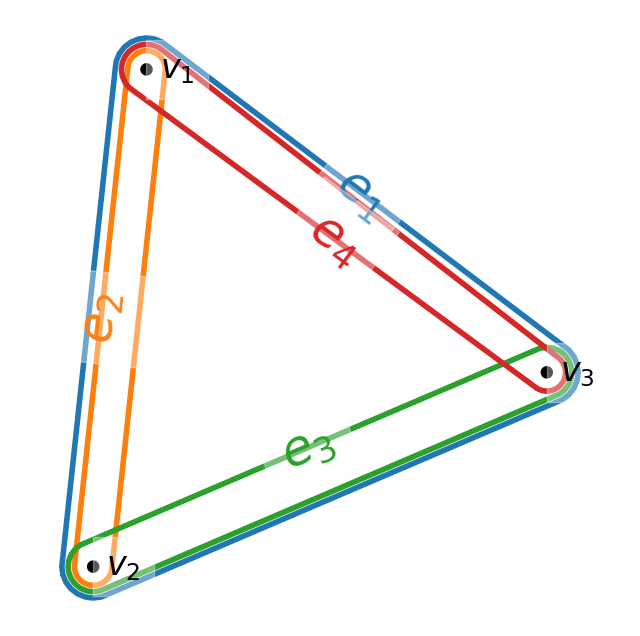

In [6]:
# \alpha acyclic, but not \beta-acyclic

# Beta Triangle

scenes = {
    '$e_1$': ('$v_1$', '$v_2$', '$v_3$'),
    '$e_2$': ('$v_1$', '$v_2$'),
    '$e_4$': ('$v_1$', '$v_3$'),
    '$e_3$': ('$v_2$', '$v_3$')
}

H = hnx.Hypergraph(scenes)


kwargs = {'layout_kwargs': {'seed': 16}, 'with_node_counts': False, 'with_edge_labels': True}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 24
    },
    edge_labels_kwargs={
        'fontsize': 36
    },
    edges_kwargs={
        'linewidths': 4
    },
    **kwargs
)

#plt.savefig("alphaNoBetaAcyclicHypergraph.png")

# Incidence Graph

In [15]:
# \alpha acyclic, but not \beta-acyclic

# Beta Triangle

scenes = {
    '$e_1$': ('$v_1$', '$v_2$', '$v_3$'),
    '$e_2$': ('$v_1$', '$v_2$'),
    '$e_4$': ('$v_1$', '$v_3$'),
    '$e_3$': ('$v_2$', '$v_3$')
}

scenes2 = scenes = {
    '$e_1$': ('$v_5$', '$v_4$', '$v_3$'),
    '$e_2$': ('$v_5$', '$v_4$'),
    '$e_4$': ('$v_5$', '$v_3$'),
    '$e_3$': ('$v_4$', '$v_3$')
}

H = hnx.Hypergraph(scenes)

H2 = hnx.Hypergraph(scenes2)

G = H.bipartite()

G2 = H2.bipartite()

print(nx.is_isomorphic(G,G2))

# firstNodes = {'$e_1$', '$e_2$', '$e_3$', '$e_4$'}

# pos = nx.bipartite_layout(G, firstNodes) # Position layout of G

# # Draw the graph
# nx.draw(
#     G, pos, edge_color='black', width=2, linewidths=1,
#     node_size=2500, font_size=36, node_color='pink', alpha=1,
#     labels={node: node for node in G.nodes()} 
# )

#plt.savefig("alphaNoBetaAcyclicHypergraph.png")

True


In [ ]:
{'e0': [1, 2, 3, 4, 5, 6], 'e1': [1, 2, 3, 4], 'e2': [1, 2, 3, 5], 'e3': [4, 5, 6]}
{'e0': [1, 2, 3, 4, 5, 6], 'e1': [1, 2, 3, 4], 'e2': [1, 2, 3, 6], 'e3': [1, 4, 6]}
{'e0': [1, 2, 3, 4, 5, 6], 'e1': [1, 2, 3, 4], 'e2': [1, 2, 5, 6], 'e3': [1, 3, 5]}
{'e0': [1, 2, 3, 4, 5, 6], 'e1': [1, 2, 3, 4], 'e2': [1, 2, 5, 6], 'e3': [3, 4, 5]}]

# GYO Alogrithm